In [ ]:
# 1. Ваш код должен быть снабжен комментариями – преподаватель не должен догадываться
# – что имелось ввиду.
# 2. Выберите датасет из встроенного в seaborn для дальнейшего анализа (опционально –
# можно взять любые открытые данные, используя любой открытый репозиторий).
# 3. Найдите описание датасета (о чем данные, где взят и т.п.) и данных (описание – что
# характеризует, тип) и добавьте в отчет. Изучение предметной области – немаловажный
# шаг для аналитика данных.
# 4. Проверьте – есть ли отсутствующие данные, если есть – удалите.
# 5. Используя различного рода визуализации проведите исследование данных:
# закономерности, зависимости, распределения. Снабдите каждый график необходимыми
# подписями (заголовок, оси, легенда и т.п.), выберите подходящую цветовую гамму. В
# качестве образца можно взять данный Урок.
# 6. По желанию можно добавить графики и диаграммы, не описанные в Уроке.
# 7. По каждому графику должен быть вывод – что исследовано и что получено.
# 8. Сделайте общий вывод по работе.

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Отсутствующие данные:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


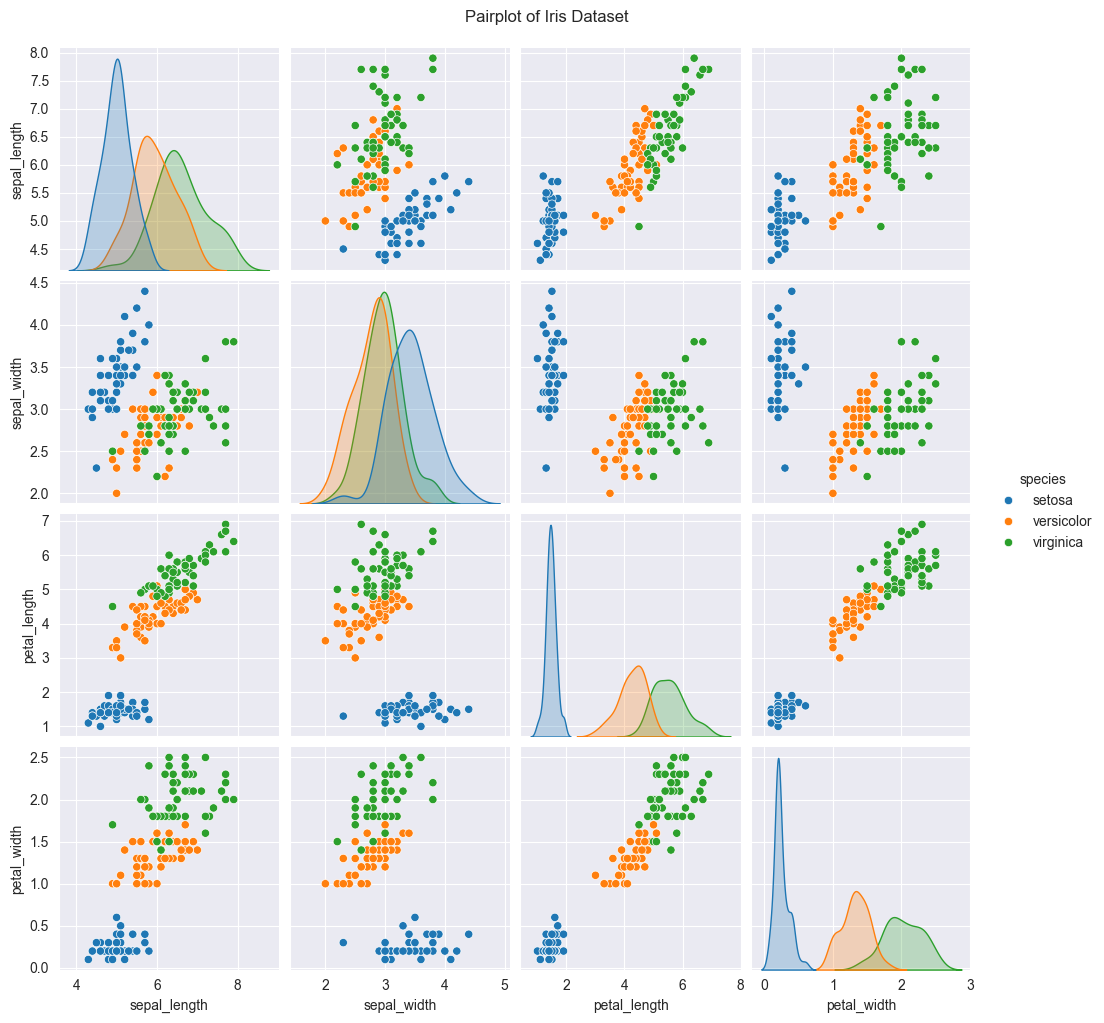

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


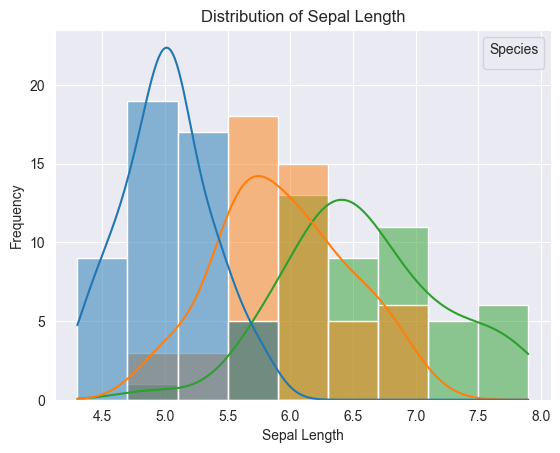

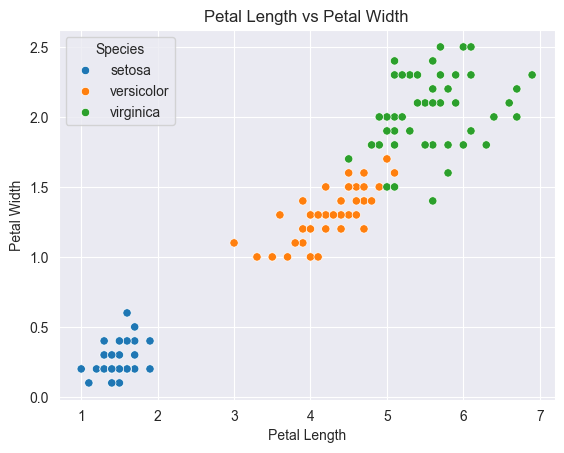

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка встроенного датасета
df = sns.load_dataset('iris')

# Описание датасета
# Датасет содержит данные о различных видах ирисов.
# Для каждого ириса указаны четыре характеристики: длина чашелистника, ширина чашелистника, длина лепестка, ширина лепестка.
# Данные взяты из классического набора данных Fisher's Iris.

# Вывод первых нескольких строк датасета для ознакомления
print(df.head())

# Проверка на отсутствующие данные и удаление их
print("Отсутствующие данные:")
print(df.isnull().sum())  # Проверка наличия пропущенных значений в каждом столбце
df.dropna(inplace=True)  # Удаление строк с пропущенными значениями

# Исследование данных с помощью визуализации
# Построение попарных графиков для каждой пары характеристик
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# График распределения длины чашелистика для каждого вида ириса
sns.histplot(data=df, x='sepal_length', hue='species', kde=True)
plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.legend(title='Species')
plt.show()

# График зависимости длины лепестка от ширины лепестка
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.title("Petal Length vs Petal Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title='Species')
plt.show()

# Общий вывод
# После анализа данных видно, что различные виды ирисов имеют разные характеристики своих чашелистников и лепестков.
# Визуализация позволяет легко выявить закономерности и зависимости между характеристиками, а также идентифицировать виды ирисов.
# Это может быть полезно для ботаников и других исследователей при классификации ирисов.


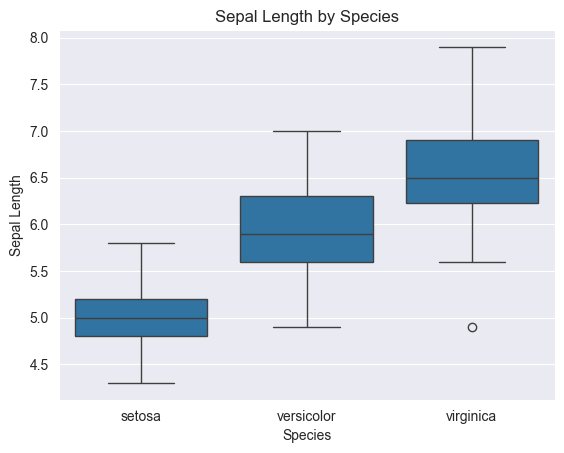

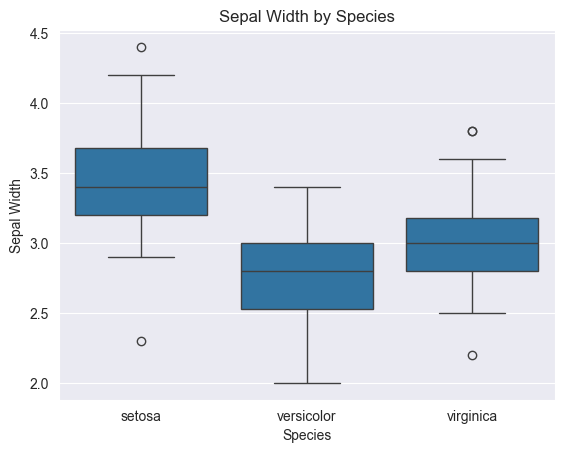

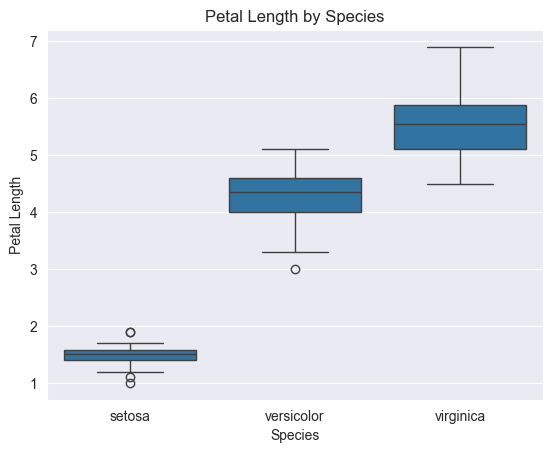

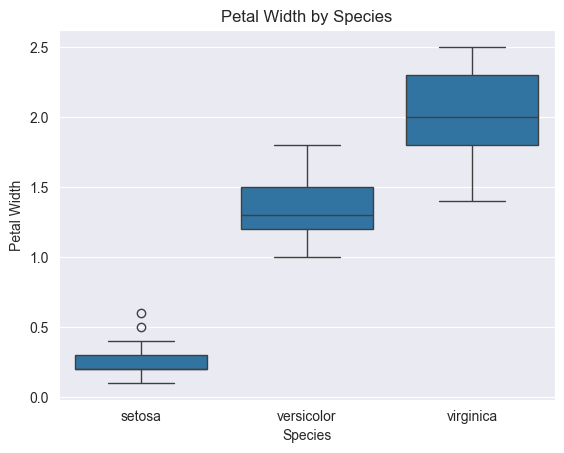

In [3]:
# Ящик с усами для длины чашелистика по видам ирисов
sns.boxplot(data=df, x='species', y='sepal_length')
plt.title("Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.show()

# Ящик с усами для ширины чашелистика по видам ирисов
sns.boxplot(data=df, x='species', y='sepal_width')
plt.title("Sepal Width by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width")
plt.show()

# Ящик с усами для длины лепестка по видам ирисов
sns.boxplot(data=df, x='species', y='petal_length')
plt.title("Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length")
plt.show()

# Ящик с усами для ширины лепестка по видам ирисов
sns.boxplot(data=df, x='species', y='petal_width')
plt.title("Petal Width by Species")
plt.xlabel("Species")
plt.ylabel("Petal Width")
plt.show()

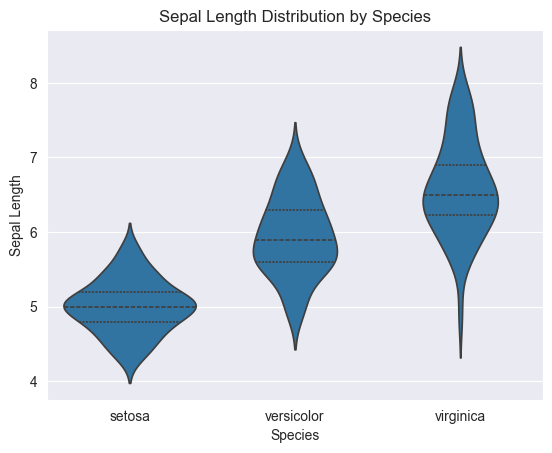

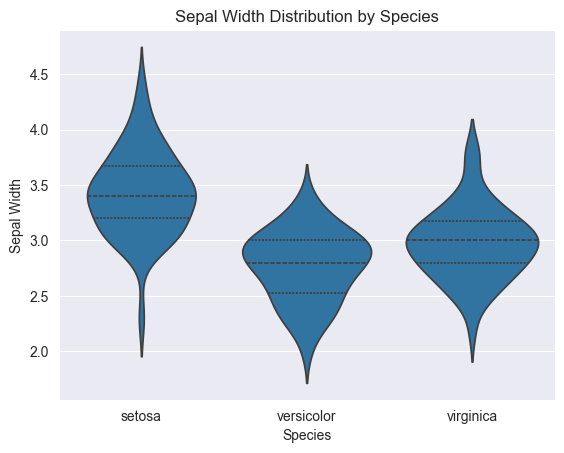

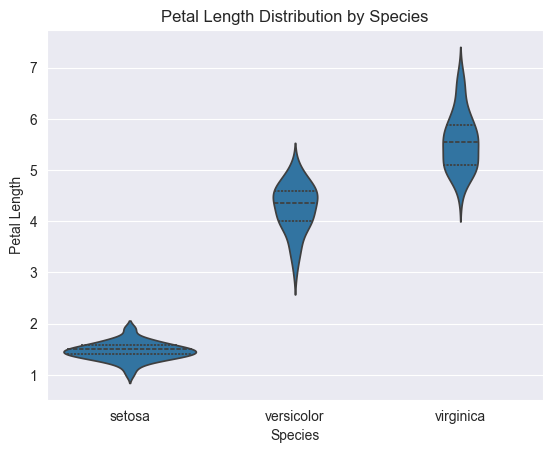

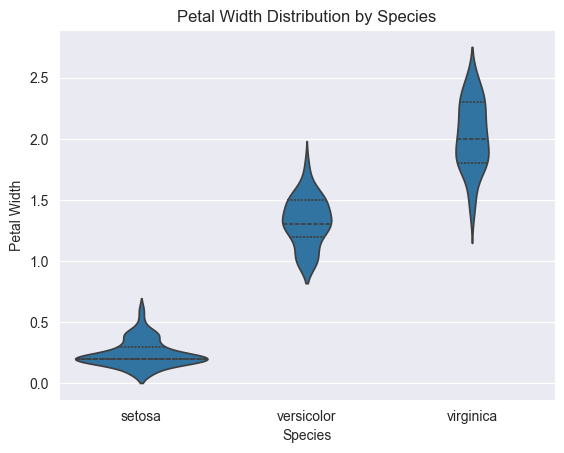

In [5]:
# Violin plot для длины чашелистика по видам ирисов
sns.violinplot(data=df, x='species', y='sepal_length', inner='quartile')
plt.title("Sepal Length Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.show()

# Violin plot для ширины чашелистика по видам ирисов
sns.violinplot(data=df, x='species', y='sepal_width', inner='quartile')
plt.title("Sepal Width Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width")
plt.show()

# Violin plot для длины лепестка по видам ирисов
sns.violinplot(data=df, x='species', y='petal_length', inner='quartile')
plt.title("Petal Length Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length")
plt.show()

# Violin plot для ширины лепестка по видам ирисов
sns.violinplot(data=df, x='species', y='petal_width', inner='quartile')
plt.title("Petal Width Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Petal Width")
plt.show()

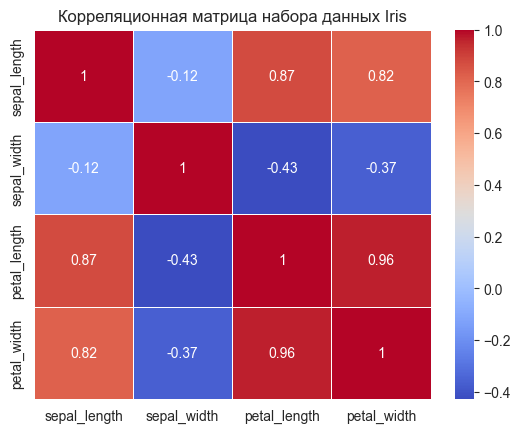

In [9]:
# Выбор только числовых столбцов
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Корреляционная матрица
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Корреляционная матрица набора данных Iris")
plt.show()
